In [1]:
#%% setup
import sys, os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sys.path.append(os.path.abspath(".."))
from complex_mlp.model import ComplexMLP

# Adat betöltése
data = np.load("../data/processed/dataset_preProcessed.npz")
X = data["images"].reshape(len(data["images"]), -1) / 255.0
y = data["labels"]
X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

input_dim = X_tr.shape[1]  # 768
layer_sizes = [input_dim, 512, 10]


In [7]:
#%% activation konfigurációk (most már 2 elemes listák)
activation_configs = {
    "relu":     ["relu",   "softmax"],
     "relu_tanh": ["relu",  "tanh"],
    "tanh":     ["tanh",   "softmax"],

    "sigmoid":  ["sigmoid","softmax"],
    "soft_sigmoid": ["softmax",  "sigmoid"],
    "soft_soft": ["softmax",  "softmax"],
    "soft_tanh":     ["softmax",   "tanh"],  
   
}



In [8]:
#%% futtató ciklus
results = []

for name, acts in activation_configs.items():
    print(f"--- Teszt: {name} ---")
    model = ComplexMLP(
        layer_sizes=layer_sizes,
        activations=acts,
        loss="cross_entropy",
        optimizer="sgd",
        optimizer_kwargs={"lr":0.001},
        early_stopping=False
    )
    history = model.train(
        X_train=X_tr, y_train=y_tr,
        X_val=X_val,   y_val=y_val,
        epochs=10, batch_size=32
    )
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print(f"{name} → val_accuracy = {acc:.4f}\n")
    results.append({
        "activations": name,
        "config": acts,
        "val_accuracy": acc
    })

df = pd.DataFrame(results).sort_values("val_accuracy", ascending=False)
display(df)


--- Teszt: relu ---
Epoch 1/10  train_loss=0.8432  val_loss=0.7306
Epoch 2/10  train_loss=0.6539  val_loss=0.5798
Epoch 3/10  train_loss=0.5230  val_loss=0.4741
Epoch 4/10  train_loss=0.4388  val_loss=0.4084
Epoch 5/10  train_loss=0.3867  val_loss=0.3665
Epoch 6/10  train_loss=0.3536  val_loss=0.3396
Epoch 7/10  train_loss=0.3313  val_loss=0.3212
Epoch 8/10  train_loss=0.3157  val_loss=0.3077
Epoch 9/10  train_loss=0.3042  val_loss=0.2976
Epoch 10/10  train_loss=0.2949  val_loss=0.2892
relu → val_accuracy = 0.9010

--- Teszt: relu_tanh ---
Epoch 1/10  train_loss=1.0356  val_loss=0.7989
Epoch 2/10  train_loss=0.6975  val_loss=0.6213
Epoch 3/10  train_loss=0.5757  val_loss=0.5452
Epoch 4/10  train_loss=0.5171  val_loss=0.4988
Epoch 5/10  train_loss=0.4778  val_loss=0.4595
Epoch 6/10  train_loss=0.4462  val_loss=0.4356
Epoch 7/10  train_loss=0.4238  val_loss=0.4115
Epoch 8/10  train_loss=0.4052  val_loss=0.3963
Epoch 9/10  train_loss=0.3883  val_loss=0.3761
Epoch 10/10  train_loss=0.3749 

,activations,config,val_accuracy
0,relu,"[relu, softmax]",0.901049
2,tanh,"[tanh, softmax]",0.898316
1,relu_tanh,"[relu, tanh]",0.894550
3,sigmoid,"[sigmoid, softmax]",0.792645
4,soft_sigmoid,"[softmax, sigmoid]",0.725594
5,soft_soft,"[softmax, softmax]",0.725594
6,soft_tanh,"[softmax, tanh]",0.725594


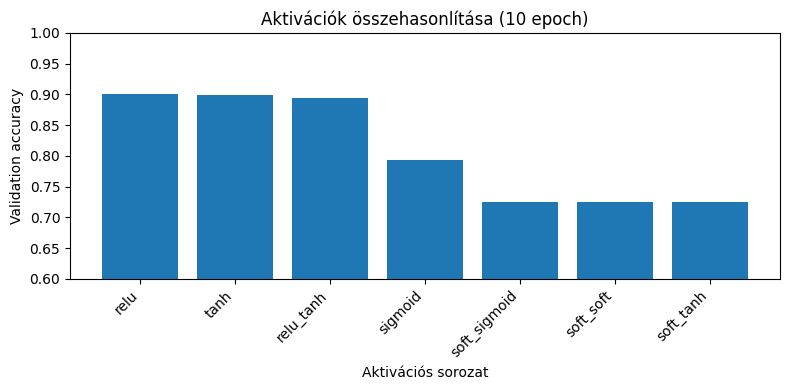

In [10]:
#%% vizualizáció
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(df["activations"], df["val_accuracy"])
plt.xlabel("Aktivációs sorozat")
plt.ylabel("Validation accuracy")
plt.title("Aktivációk összehasonlítása (10 epoch)")
plt.ylim(0.6,1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
